In [14]:
from keras.layers import Dense,Activation
from keras.layers.recurrent import SimpleRNN,GRU,LSTM
from keras.models import Sequential
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split

In [95]:
SEQLEN=10
STEP=1

directory=np.load("../data/generate_data/directory")
#directory=to_categorical(directory,num_classes=10)


input_directory=[]
label_directory=[]
for i in range(0,len(directory)-SEQLEN-1,STEP):
    input_directory.append(directory[i+1:i+SEQLEN+1]-directory[i:i+SEQLEN])
    label_directory.append(directory[i+SEQLEN+1]-directory[i+SEQLEN])

    
#input_directory=to_categorical(input_directory,num_classes=10)
#label_directory=to_categorical(label_directory,num_classes=10)
#label_directory=label_directory.reshape(1772,50)
#input_directory=input_directory.reshape(1772,10,50)

#label_directory
#label_directory.shape,input_directory.shape
input_directory=np.mod(input_directory,10)
label_directory=np.mod(label_directory,10)
#input_directory.reshape(1772,10,5,1)
#label_directory.reshape(1772,10,5,1)
input_directory.shape,label_directory.shape

((1762, 10, 5), (1762, 5))

In [96]:
Xtrain,Xtest,ytrain,ytest=train_test_split(input_directory,label_directory,test_size=0.2,random_state=42)
Xtrain.shape,ytrain.shape
ytrain

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1]])

In [88]:
HIDDEN_SIZE=16
BATCH_SIZE=32

model=Sequential()
model.add(LSTM(HIDDEN_SIZE,return_sequences=False,input_shape=(10,5),unroll=True))
model.add(Dense(32,activation="relu"))
model.add(Dense(5))
#model.add(Activation("relu"))

model.compile(loss="mse",optimizer="rmsprop",metrics=['acc','mse'])

In [89]:
plot_model(model,to_file="../img/directory_SimpleRNN_model.png",show_shapes=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 16)                1408      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 165       
Total params: 2,117
Trainable params: 2,117
Non-trainable params: 0
_________________________________________________________________


In [90]:
history=model.fit(Xtrain,ytrain,batch_size=BATCH_SIZE,epochs=50,validation_data=(Xtest,ytest))

Train on 1409 samples, validate on 353 samples
Epoch 1/50
1409/1409 [==============================] - 3s 2ms/step - loss: 0.1334 - acc: 0.7211 - mean_squared_error: 0.1334 - val_loss: 0.0317 - val_acc: 0.8924 - val_mean_squared_error: 0.0317
Epoch 2/50
1409/1409 [==============================] - 0s 249us/step - loss: 0.0207 - acc: 0.9021 - mean_squared_error: 0.0207 - val_loss: 0.0220 - val_acc: 0.8924 - val_mean_squared_error: 0.0220
Epoch 3/50
1409/1409 [==============================] - 0s 243us/step - loss: 0.0193 - acc: 0.9021 - mean_squared_error: 0.0193 - val_loss: 0.0214 - val_acc: 0.8924 - val_mean_squared_error: 0.0214
Epoch 4/50
1409/1409 [==============================] - 0s 223us/step - loss: 0.0191 - acc: 0.9021 - mean_squared_error: 0.0191 - val_loss: 0.0211 - val_acc: 0.8924 - val_mean_squared_error: 0.0211
Epoch 5/50
1409/1409 [==============================] - 0s 233us/step - loss: 0.0186 - acc: 0.9021 - mean_squared_error: 0.0186 - val_loss: 0.0217 - val_acc: 0.892

Epoch 42/50
1409/1409 [==============================] - 0s 228us/step - loss: 0.0021 - acc: 0.9418 - mean_squared_error: 0.0021 - val_loss: 0.0021 - val_acc: 0.9008 - val_mean_squared_error: 0.0021
Epoch 43/50
1409/1409 [==============================] - 0s 247us/step - loss: 0.0024 - acc: 0.9290 - mean_squared_error: 0.0024 - val_loss: 0.0043 - val_acc: 0.9887 - val_mean_squared_error: 0.0043
Epoch 44/50
1409/1409 [==============================] - 0s 235us/step - loss: 0.0020 - acc: 0.9454 - mean_squared_error: 0.0020 - val_loss: 0.0022 - val_acc: 0.9887 - val_mean_squared_error: 0.0022
Epoch 45/50
1409/1409 [==============================] - 0s 235us/step - loss: 0.0020 - acc: 0.9489 - mean_squared_error: 0.0020 - val_loss: 0.0023 - val_acc: 0.9887 - val_mean_squared_error: 0.0023
Epoch 46/50
1409/1409 [==============================] - 0s 234us/step - loss: 0.0022 - acc: 0.9489 - mean_squared_error: 0.0022 - val_loss: 0.0023 - val_acc: 0.8924 - val_mean_squared_error: 0.0023
Epoch

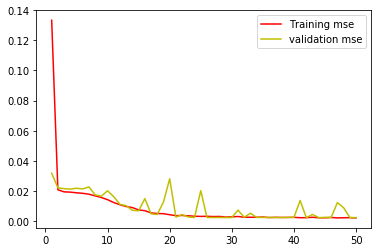

In [91]:
#acc=history.history['acc']
#val_acc=history.history['val_acc']
loss=history.history['mean_squared_error']
val_loss=history.history['val_mean_squared_error']

epochs=range(1,len(loss)+1)

#plt.plot(epochs,acc,'b',label="Training acc")
#plt.plot(epochs,val_acc,'g',label="Validation acc")
plt.plot(epochs,loss,'r',label="Training mse")
plt.plot(epochs,val_loss,'y',label="validation mse")

plt.legend()
#plt.figure()
plt.savefig("../img/directory_LSTM.png")
#plt.show()

In [92]:
model.save("../model/directory_LSTM.h5")
model_r=load_model("../model/directory_LSTM.h5")

In [93]:
directory_global=[[0]*5]*10
directory_model=load_model("../model/directory_LSTM.h5")

In [121]:
def directory_predict(directory):
    global directory_global,directory_model
    directory_global=directory_global[1:]
    directory_global.append(np.array(directory)-np.array(directory_global[8]))
    #y=to_categorical(directory_global,num_classes=10)
    y=np.array(directory_global)
    y=y.reshape(1,10,5)
    pred=directory_model.predict(y,verbose=0)[0]
    #p=np.argmax(pred)
    #return [p//10000,p//1000-p//10000*10,p//100-p//1000*10,p//10-p//100*10,p-p//10*10]
    ret=[]
    for i in pred:
        ret.append(i)
    return ret
directory_predict([1,1,0,2,0])

[0.06856522, -0.006919693, 0.08917626, 0.049991444, 0.97529817]

In [36]:
import predict
import imp
imp.reload(predict)

<module 'predict' from '/home/drdh/lx/X-dll/LSTM/model/model_src/predict.py'>

In [37]:
predict.network([10,11,12,3],36,1,[1,1,0,0,3],34,1,1,[18,6,2,17],[18,6,2,7],[18,6,2,7],1)

([0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
 0,
 0,
 [0, 0, 0, 0, 0],
 1,
 0,
 0,
 [0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 0)

In [73]:
directory_global=[[0]*5]*10
directory_model=load_model("../model/directory_LSTM.h5")
def directory_predict(directory):
    global directory_global,directory_model
    directory_global=directory_global[1:]
    directory_global.append(np.array(directory)-np.array(directory_global[8]))
    #y=to_categorical(directory_global,num_classes=10)
    y=np.array(directory_global)
    y=y.reshape(1,10,5)
    pred=directory_model.predict(y,verbose=0)[0]
    #p=np.argmax(pred)
    #return [p//10000,p//1000-p//10000*10,p//100-p//1000*10,p//10-p//100*10,p-p//10*10]
    ret=[]
    for i in pred:
        ret.append((i))
    return ret

In [108]:
def directory_predict(directory):
    global directory_global,directory_model
    directory_global=directory_global[1:]
    directory_global.append(np.array(directory)-np.array(directory_global[8]))
    #y=to_categorical(directory_global,num_classes=10)
    y=np.array(directory_global)
    y=y.reshape(1,10,5)
    pred=directory_model.predict(y,verbose=0)[0]
    #p=np.argmax(pred)
    #return [p//10000,p//1000-p//10000*10,p//100-p//1000*10,p//10-p//100*10,p-p//10*10]
    ret=[]
    for i in pred:
        ret.append(int(i))
    return ret
directory_predict([1,1,0,2,0])

[0, 0, 0, 0, 0]

In [13]:
history.history.keys()

dict_keys(['val_loss', 'mean_squared_error', 'acc', 'loss', 'val_acc', 'val_mean_squared_error'])

In [80]:
a=np.array([1,-3])
a=np.mod([1,-4],5)
a

array([1, 1])